In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, SpectralClustering
from IPython.display import display

def cluster_by_record(df, features, record_type, eps=1.2, min_samples=3, n_clusters=4):
    print(f"\n{'='*30}\n分析类型：{record_type}\n{'='*30}")
    # 1. 只保留指定 record 的所有年份数据
    df_sub = df[df['record'] == record_type].copy()

    # 2. 删除有空值的行
    df_sub_filtered = df_sub.dropna(subset=features)

    # 3. 按国家对特征取均值
    country_mean = df_sub_filtered.groupby('country')[features].mean()

    # 4. 标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(country_mean[features].values)

    # 5. DBSCAN聚类
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    db_labels = dbscan.fit_predict(X_scaled)
    country_mean['DBSCAN_Label'] = db_labels

    # 6. 谱聚类
    sc = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    spectral_labels = sc.fit_predict(X_scaled)
    country_mean['Spectral_Label'] = spectral_labels

    # 7. 输出聚类分布
    print(f"{record_type} DBSCAN 聚类分布：")
    print(country_mean['DBSCAN_Label'].value_counts())
    print(f"{record_type} 谱聚类分布：")
    print(country_mean['Spectral_Label'].value_counts())

    # 8. 输出DBSCAN每类国家名单
    for label in sorted(country_mean['DBSCAN_Label'].unique()):
        print(f"\n{record_type}-DBSCAN标签 {label}（国家数：{(country_mean['DBSCAN_Label']==label).sum()}）:")
        print(country_mean[country_mean['DBSCAN_Label']==label].index.tolist())

    # 9. 输出谱聚类每类国家名单
    for label in sorted(country_mean['Spectral_Label'].unique()):
        print(f"\n{record_type}-谱聚类标签 {label}（国家数：{(country_mean['Spectral_Label']==label).sum()}）:")
        print(country_mean[country_mean['Spectral_Label']==label].index.tolist())

    # 10. 显示表头
    display(country_mean.head())
    print("\n" + "="*40 + "\n")
    return country_mean

# ----------- 主程序部分 ----------------

# 1. 读取数据和特征列
df = pd.read_csv('NFA 2018.csv')
features = ['crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
            'built_up_land', 'carbon', 'total', 'Percapita GDP (2010 USD)']

print(f"原始国家数量：{df['country'].nunique()}")

# 2. 循环分析不同record类型
for record_type in ['BiocapTotGHA', 'EFConsTotGHA', 'EFExportsTotGHA', 'EFProdTotGHA', 'EFImportsTotGHA']:
    cluster_by_record(df, features, record_type, eps=1.2, min_samples=3, n_clusters=4)


原始国家数量：196

分析类型：BiocapTotGHA
BiocapTotGHA DBSCAN 聚类分布：
DBSCAN_Label
 0    154
-1      8
Name: count, dtype: int64
BiocapTotGHA 谱聚类分布：
Spectral_Label
1    60
0    58
2    25
3    19
Name: count, dtype: int64

BiocapTotGHA-DBSCAN标签 -1（国家数：8）:
['Australia', 'Brazil', 'Canada', 'China', 'India', 'Russian Federation', 'United States of America', 'World']

BiocapTotGHA-DBSCAN标签 0（国家数：154）:
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo', 'Congo, Democratic Republic of', 'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'F

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),DBSCAN_Label,Spectral_Label
country,,,,,,,,,,
Afghanistan,6.570280e+06,5.912487e+06,6.163092e+05,0.000000e+00,1.026553e+06,0.0,1.412563e+07,483.691462,0,1
Albania,1.070248e+06,5.720245e+05,9.441617e+05,2.384045e+05,8.023544e+04,0.0,2.905074e+06,2604.082286,0,0
Algeria,7.898586e+06,1.067090e+07,1.100761e+06,3.212568e+05,1.092607e+06,0.0,2.108411e+07,4675.890000,0,0
Angola,2.929581e+06,2.991865e+07,1.366818e+07,5.467992e+06,5.328045e+05,0.0,5.251721e+07,2590.511667,0,1
Argentina,5.575479e+07,7.426332e+07,3.222909e+07,7.045367e+07,2.404920e+06,0.0,2.351058e+08,7657.573519,0,0





分析类型：EFConsTotGHA
EFConsTotGHA DBSCAN 聚类分布：
DBSCAN_Label
 0    156
-1      6
Name: count, dtype: int64
EFConsTotGHA 谱聚类分布：
Spectral_Label
1    64
0    54
3    25
2    19
Name: count, dtype: int64

EFConsTotGHA-DBSCAN标签 -1（国家数：6）:
['Brazil', 'China', 'India', 'Japan', 'United States of America', 'World']

EFConsTotGHA-DBSCAN标签 0（国家数：156）:
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo', 'Congo, Democratic Republic of', 'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'Fran

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),DBSCAN_Label,Spectral_Label
country,,,,,,,,,,
Afghanistan,8.383506e+06,5.333327e+06,2.101798e+06,4.855170e+03,1.026553e+06,2.862933e+06,1.971297e+07,483.691462,0,0
Albania,1.700929e+06,6.904112e+05,6.412633e+05,4.089344e+04,8.023544e+04,2.473739e+06,5.627471e+06,2604.082286,0,1
Algeria,2.268643e+07,7.134556e+06,6.739892e+06,6.011608e+05,1.092607e+06,5.708592e+07,9.534057e+07,4675.890000,0,1
Angola,4.423002e+06,2.778717e+06,2.003913e+06,1.228205e+06,5.328045e+05,3.785497e+06,1.475214e+07,2590.511667,0,1
Argentina,1.893293e+07,4.346380e+07,6.820888e+06,4.079462e+06,2.404920e+06,3.421993e+07,1.099219e+08,7657.573519,0,1





分析类型：EFExportsTotGHA
EFExportsTotGHA DBSCAN 聚类分布：
DBSCAN_Label
 0    141
-1     12
 1      5
 2      4
Name: count, dtype: int64
EFExportsTotGHA 谱聚类分布：
Spectral_Label
1    44
3    43
0    42
2    33
Name: count, dtype: int64

EFExportsTotGHA-DBSCAN标签 -1（国家数：12）:
['Australia', 'Canada', 'China', 'Denmark', 'Ecuador', 'Germany', 'New Zealand', 'Norway', 'Russian Federation', 'Saudi Arabia', 'United States of America', 'World']

EFExportsTotGHA-DBSCAN标签 0（国家数：141）:
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo', 'Congo, Democratic Republic of', 'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', "Côte d'Ivoire", 'Djibouti', 'Dominican Republic', 'E

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),DBSCAN_Label,Spectral_Label
country,,,,,,,,,,
Afghanistan,1.920282e+05,3.744808e+04,19008.700186,2.254683e-03,0.0,6.027510e+04,3.087601e+05,483.691462,0,1
Albania,3.481282e+04,1.300714e+04,30706.759234,1.762820e+04,0.0,1.771519e+05,2.733068e+05,2604.082286,0,3
Algeria,2.668390e+05,1.712106e+03,19717.193590,7.393508e+03,0.0,6.117231e+06,6.412893e+06,4675.890000,0,3
Angola,2.396555e+04,8.872063e+03,9891.337624,3.556797e+04,0.0,3.015960e+06,3.094257e+06,2590.511667,0,3
Argentina,3.772670e+07,1.794834e+07,826308.197990,4.038622e+06,0.0,1.203086e+07,7.257083e+07,7657.573519,0,0





分析类型：EFProdTotGHA
EFProdTotGHA DBSCAN 聚类分布：
DBSCAN_Label
 0    157
-1      5
Name: count, dtype: int64
EFProdTotGHA 谱聚类分布：
Spectral_Label
0    65
1    53
2    25
3    19
Name: count, dtype: int64

EFProdTotGHA-DBSCAN标签 -1（国家数：5）:
['Brazil', 'China', 'India', 'United States of America', 'World']

EFProdTotGHA-DBSCAN标签 0（国家数：157）:
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo', 'Congo, Democratic Republic of', 'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Fre

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),DBSCAN_Label,Spectral_Label
country,,,,,,,,,,
Afghanistan,6.570280e+06,5.281590e+06,1.868411e+06,1.511553e+03,1.026553e+06,1.911503e+06,1.665985e+07,483.691462,0,1
Albania,1.070248e+06,5.720245e+05,5.654304e+05,2.187951e+04,8.023544e+04,1.629349e+06,3.939167e+06,2604.082286,0,0
Algeria,7.898586e+06,4.894426e+06,3.350301e+06,2.950554e+05,1.092607e+06,4.570675e+07,6.323773e+07,4675.890000,0,0
Angola,2.929581e+06,2.454071e+06,1.957076e+06,8.582988e+05,5.328045e+05,2.652270e+06,1.138410e+07,2590.511667,0,0
Argentina,5.575479e+07,6.127453e+07,6.048489e+06,7.971022e+06,2.404920e+06,3.960532e+07,1.730591e+08,7657.573519,0,0





分析类型：EFImportsTotGHA
EFImportsTotGHA DBSCAN 聚类分布：
DBSCAN_Label
 0    150
-1      8
 1      4
Name: count, dtype: int64
EFImportsTotGHA 谱聚类分布：
Spectral_Label
0    51
3    49
1    35
2    27
Name: count, dtype: int64

EFImportsTotGHA-DBSCAN标签 -1（国家数：8）:
['China', 'Denmark', 'Germany', 'Japan', 'Russian Federation', 'Spain', 'United States of America', 'World']

EFImportsTotGHA-DBSCAN标签 0（国家数：150）:
['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo', 'Congo, Democratic Republic of', 'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', "Côte d'Ivoire", 'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Equatorial Guinea', 

,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),DBSCAN_Label,Spectral_Label
country,,,,,,,,,,
Afghanistan,2.005254e+06,8.918526e+04,2.523966e+05,3343.619555,0.0,1.011705e+06,3.361885e+06,483.691462,0,3
Albania,6.654939e+05,1.313939e+05,1.065396e+05,36642.125435,0.0,1.021542e+06,1.961611e+06,2604.082286,0,0
Algeria,1.505469e+07,2.241842e+06,3.409309e+06,313498.880800,0.0,1.749640e+07,3.851574e+07,4675.890000,0,1
Angola,1.517386e+06,3.335182e+05,5.672887e+04,405474.482180,0.0,4.149187e+06,6.462295e+06,2590.511667,0,0
Argentina,9.048467e+05,1.376103e+05,1.598707e+06,147062.680343,0.0,6.645468e+06,9.433695e+06,7657.573519,0,0


In [68]:
mean_table = []
record_types = ['BiocapTotGHA', 'EFConsTotGHA', 'EFExportsTotGHA', 'EFProdTotGHA', 'EFImportsTotGHA']

for record_type in record_types:
    df_sub = df[df['record'] == record_type].dropna(subset=features)
    row = df_sub[features].mean()
    row.name = record_type
    mean_table.append(row)

# 合并成一个表
mean_df = pd.DataFrame(mean_table)
print("表1  五类生态足迹/承载力指标特征均值汇总表\n")
display(mean_df)


表1  五类生态足迹/承载力指标特征均值汇总表



,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD)
BiocapTotGHA,4.799868e+07,2.656190e+07,9.771603e+07,2.086867e+07,4.981484e+06,0.000000e+00,1.981268e+08,11002.696993
EFConsTotGHA,4.763102e+07,1.836627e+07,3.135371e+07,8.841692e+06,4.981484e+06,1.354207e+08,2.465949e+08,11002.696993
EFExportsTotGHA,1.172998e+07,3.860453e+06,7.358458e+06,1.131167e+06,0.000000e+00,1.220752e+07,3.628758e+07,11002.696993
EFProdTotGHA,4.799868e+07,1.771110e+07,3.111600e+07,8.826957e+06,4.981484e+06,1.322964e+08,2.429307e+08,11002.696993
EFImportsTotGHA,1.154329e+07,4.399345e+06,7.573179e+06,1.132798e+06,0.000000e+00,1.533124e+07,3.997985e+07,11002.696993


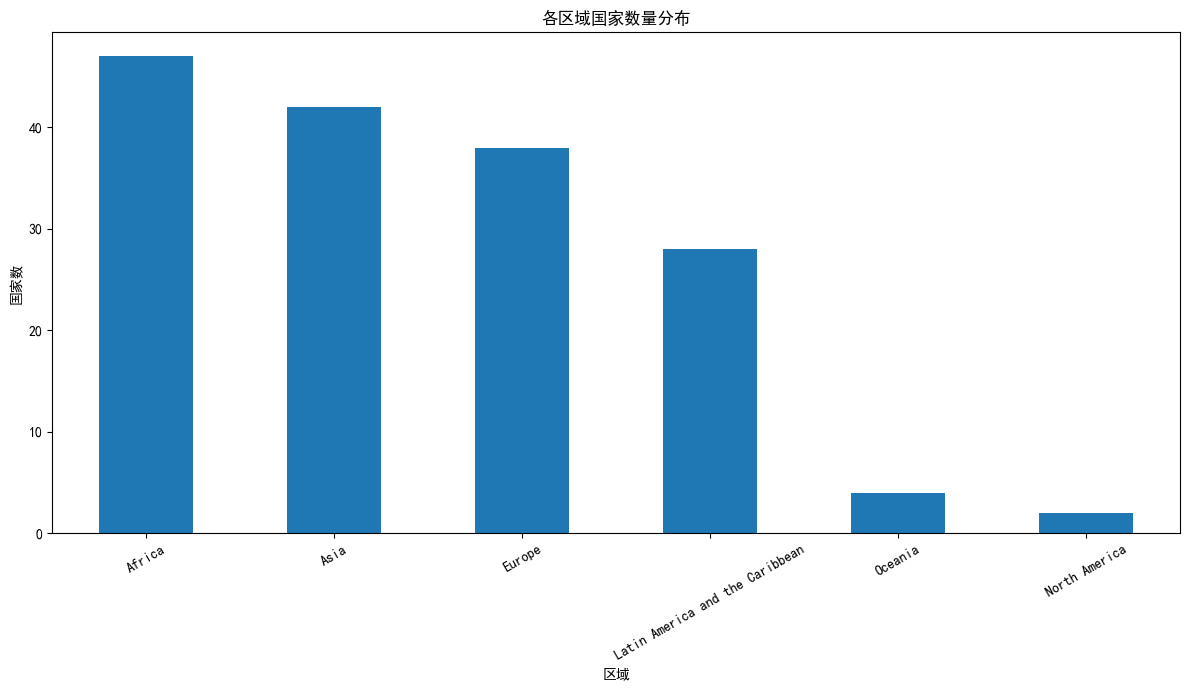

In [69]:
import matplotlib.pyplot as plt

# 筛选各国，只保留每个国家的唯一值
unique_countries = df_cleaned[['country', 'UN_region']].drop_duplicates()

# 去掉 country 为 'World' 的记录
unique_countries_no_world = unique_countries[unique_countries['country'] != 'World']

# 统计每个区域的国家数量
region_counts = unique_countries_no_world['UN_region'].value_counts().sort_values(ascending=False)

# 画条形图
plt.figure(figsize=(12, 7))
region_counts.plot(kind='bar')
plt.xlabel('区域')
plt.ylabel('国家数')
plt.title('各区域国家数量分布')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


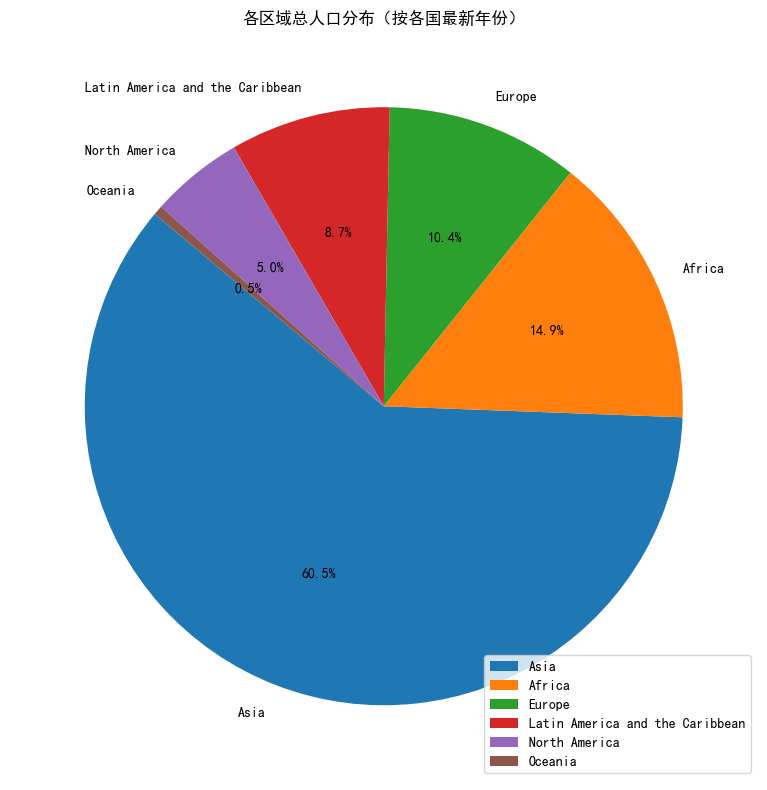

In [70]:
# 对每个国家找到最新年份的数据，再取出人口与区域
idx = df_filtered.groupby('country')['year'].idxmax()
latest_pop_info = df_filtered.loc[idx, ['country', 'UN_region', 'population']]

# 按区域汇总人口总量
region_pop_sum = latest_pop_info.groupby('UN_region')['population'].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 1. 去除 'World' 区域（有的文件是 'World'，有的是 '世界'，请根据实际调整）
region_pop_sum = region_pop_sum.drop(labels=['World'], errors='ignore')

# 2. 画扇形图
plt.figure(figsize=(8, 8))
region_pop_sum.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    ylabel='',
    legend=True
)
plt.title('各区域总人口分布（按各国最新年份）')
plt.tight_layout()
plt.show()